<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

from fastai.imports import *
from fastai.torch_imports import *
from fastai.dataset import *
from fastai.learner import *
from fastai.structured import *
from fastai.column_data import *
import feather

In [3]:
PATH = 'data/elo/'

In [4]:
dep = 'target'
df_raw = feather.read_dataframe('train_df')

/home/chandrasekhar/anaconda3/envs/fastai/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [5]:
# train_df2= feather.read_dataframe('train_df_alpha')

In [6]:
df_test = feather.read_dataframe('test_df')

In [7]:
# df_raw.drop('outliers', axis=1, inplace=True)

In [8]:
for df in [df_raw, df_test]:
    for f in ['purchase_date_max','purchase_date_min','purchase_date_max_old',\
                     'purchase_date_min_old']:
        df[f] = df[f].astype(np.int64) * 1e-9

In [9]:
cols_excluded = ['purchase_date_max', 'purchase_date_max_old', 'card_id', 'first_active_month',
                 'target','outliers','card_id_size', 'card_id_size_old', 
                 'purchase_date_min', 'purchase_date_min_old','first_active_monthYear',
                 'first_active_monthMonth',
                 'first_active_monthWeek',
                 'first_active_monthDay',
                 'first_active_monthDayofweek',
                 'first_active_monthDayofyear',
                 'first_active_monthIs_month_end',
                 'first_active_monthIs_month_start',
                 'first_active_monthIs_quarter_end',
                 'first_active_monthIs_quarter_start',
                 'first_active_monthIs_year_end',
                 'first_active_monthIs_year_start']

In [10]:
cols_included = ['feature_1','feature_2','feature_3','transactions_count','subsector_id_nunique','merchant_id_nunique','merchant_category_id_nunique','purchase_Month_mean','purchase_Month_min','purchase_Month_max','purchase_Week_nunique','purchase_Week_mean','purchase_Week_min','purchase_Week_max','purchase_Dayofweek_mean','purchase_Dayofweek_min','purchase_Dayofweek_max','purchase_Day_nunique','purchase_Day_mean','purchase_Day_min','purchase_Day_max','purchase_Hour_nunique','purchase_Hour_mean','purchase_Hour_min','purchase_Hour_max','purchase_amount_sum','purchase_amount_max','purchase_amount_min','purchase_amount_mean','purchase_amount_var','purchase_amount_skew','installments_sum','installments_max','installments_mean','installments_var','installments_skew','month_lag_max','month_lag_min','month_lag_mean','month_lag_var','month_lag_skew','month_diff_mean','month_diff_var','month_diff_skew','purchased_on_weekend_mean','category_1_mean','category_2_mean','category_3_mean','card_id_count','price_mean','price_max','price_min','price_var','Christmas_Day_2017_mean','Children_day_2017_mean','Black_Friday_2017_mean','Mothers_Day_2018_mean','duration_mean','duration_min','duration_max','duration_var','duration_skew','amount_month_ratio_mean','amount_month_ratio_min','amount_month_ratio_max','amount_month_ratio_var','amount_month_ratio_skew','category_2_mean_mean','category_3_mean_mean','purchase_date_diff','purchase_date_average','purchase_date_uptonow','purchase_date_uptomin','transactions_count_old','subsector_id_nunique_old','merchant_id_nunique_old','merchant_category_id_nunique_old','purchase_Month_nunique','purchase_Month_mean_old','purchase_Month_min_old','purchase_Month_max_old','purchase_Week_nunique_old','purchase_Week_mean_old','purchase_Week_min_old','purchase_Week_max_old','purchase_Dayofweek_mean_old','purchase_Day_nunique_old','purchase_Day_mean_old','purchase_Day_min_old','purchase_Hour_nunique_old','purchase_Hour_mean_old','purchase_Hour_min_old','purchase_Hour_max_old','purchase_amount_sum_old','purchase_amount_max_old','purchase_amount_min_old','purchase_amount_mean_old','purchase_amount_var_old','purchase_amount_skew_old','installments_sum_old','installments_max_old','installments_mean_old','installments_var_old','installments_skew_old','month_lag_max_old','month_lag_min_old','month_lag_mean_old','month_lag_var_old','month_lag_skew_old','month_diff_max','month_diff_min','month_diff_mean_old','month_diff_var_old','month_diff_skew_old','authorized_flag_mean','purchased_on_weekend_mean_old','category_1_mean_old','category_2_mean_old','category_3_mean_old','card_id_count_old','price_sum','price_mean_old','price_max_old','price_min_old','price_var_old','Christmas_Day_2017_mean_old','Mothers_Day_2017_mean','fathers_day_2017_mean','Children_day_2017_mean_old','Valentine_Day_2017_mean','Black_Friday_2017_mean_old','Mothers_Day_2018_mean_old','duration_mean_old','duration_min_old','duration_max_old','duration_var_old','duration_skew_old','amount_month_ratio_mean_old','amount_month_ratio_min_old','amount_month_ratio_max_old','amount_month_ratio_var_old','amount_month_ratio_skew_old','category_2_mean_mean_old','category_3_mean_mean_old','purchase_date_diff_old','purchase_date_average_old','purchase_date_uptonow_old','purchase_date_uptomin_old','quarter','observed_elapsed_time','days_feature1','days_feature2','days_feature3','days_feature1_ratio','days_feature2_ratio','days_feature3_ratio','feature_sum','feature_mean','feature_max','feature_min','feature_var','card_id_total','card_id_count_total','card_id_count_ratio','purchase_amount_total','purchase_amount_total_mean','purchase_amount_total_max','purchase_amount_total_min','purchase_amount_sum_ratio','hist_first_buy','new_first_buy','hist_last_buy','new_last_buy','month_diff_ratio','installments_total','installments_ratio','price_total','CLV','CLV_old','CLV_ratio']

In [11]:
df_train_columns = [c for c in df_raw.columns.values if c not in cols_excluded]

In [12]:
df_indep = df_raw[df_train_columns]

In [13]:

n_valid = 12000
n_trn = len(df_raw)-n_valid

In [14]:
cat_flds = [n for n in df_indep.columns if df_raw[n].nunique()<6 and n != 'outliers']
' '.join(cat_flds)

'feature_1 feature_2 feature_3 purchase_Year_nunique purchase_Month_nunique month_lag_max month_lag_min authorized_flag_mean purchase_Year_nunique_old'

In [15]:
len(cat_flds)

9

In [16]:
[n for n in df_indep.drop(cat_flds,axis=1).columns if not is_numeric_dtype(df_raw[n])]

[]

In [17]:
for n in cat_flds: df_raw[n] = df_raw[n].astype('category').cat.as_ordered()

cont_flds = [n for n in df_indep.columns if n not in cat_flds and n!= 'outliers']
' '.join(cont_flds)

'first_active_monthElapsed transactions_count city_id_nunique merchant_category_id_nunique merchant_id_nunique state_id_nunique subsector_id_nunique purchase_Week_nunique purchase_Day_nunique purchase_amount_sum purchase_amount_max purchase_amount_min purchase_amount_mean purchase_amount_var installments_sum installments_max installments_min installments_mean installments_var month_lag_mean month_lag_var month_diff_mean month_diff_std month_diff_var authorized_flag_sum purchased_on_weekend_sum purchased_on_weekend_mean category_1_sum category_1_mean card_id_count category_2_mean_mean category_3_mean_mean purchase_date_diff purchase_date_average purchase_date_uptonow purchase_date_uptomin inverse_avg_transactions_per_day days_since_last_transaction repurchase_merchant_rate merchant_category_repurchase avg_spend_per_merchant avg_trans_per_merchant avg_spend_per_transaction transactions_count_old city_id_nunique_old merchant_category_id_nunique_old merchant_id_nunique_old state_id_nunique

In [18]:
df_raw.replace(np.inf, 0, inplace=True)
df_raw.replace(-np.inf, 0, inplace=True)

In [19]:
df_test.replace(np.inf, 0, inplace=True)
df_test.replace(-np.inf, 0, inplace=True)

In [20]:
df_raw.shape, df_test.shape

((201917, 135), (123623, 133))

In [21]:
df_test['target'] = 0
df_test['outliers'] = 0

In [22]:
[c for c in df_raw.columns.values if c not in df_test.columns.values]

[]

In [23]:
# df_raw.dtypes

In [24]:
# df_test.dtypes

In [23]:
df_raw.shape, df_test.shape

((201917, 135), (123623, 135))

In [24]:
for n in cat_flds: df_raw[n] = df_raw[n].astype('category').cat.as_ordered()
for n in cat_flds: df_test[n] = df_test[n].astype('category').cat.as_ordered()

In [33]:
for n in cont_flds: df_raw[n] = df_raw[n].fillna(0).astype('float32')
for n in cont_flds: df_test[n] = df_test[n].fillna(0).astype('float32')

In [39]:
cat_flds

['feature_1',
 'feature_2',
 'feature_3',
 'purchase_Year_nunique',
 'purchase_Month_nunique',
 'month_lag_max',
 'month_lag_min',
 'authorized_flag_mean',
 'purchase_Year_nunique_old']

In [ ]:
for n in cont_flds: df_raw[n] = df_raw[n].fillna(0).astype('float32')
for n in cont_flds: df_test[n] = df_test[n].fillna(0).astype('float32')

In [40]:
conv_flds = ['target',
            'first_active_monthWeek',
            'first_active_monthDay',
            'first_active_monthDayofweek',
            'first_active_monthDayofyear',
            'first_active_monthMonth',
            'first_active_monthYear']

In [41]:
for n in conv_flds: df_raw[n] = df_raw[n].astype('float32')
for n in conv_flds: df_test[n] = df_test[n].astype('float32')

In [42]:
df_raw.dtypes.sort_index()

authorized_flag_mean             category
authorized_flag_mean_old          float32
authorized_flag_sum               float32
authorized_flag_sum_old           float32
avg_spend_per_merchant            float32
avg_spend_per_merchant_old        float32
avg_spend_per_transaction         float32
avg_spend_per_transaction_old     float32
avg_trans_per_merchant            float32
avg_trans_per_merchant_old        float32
card_id                            object
card_id_count                     float32
card_id_count_old                 float32
card_id_count_total               float32
card_id_size                      float64
card_id_size_old                    int64
card_id_total                     float32
category_1_mean                   float32
category_1_mean_old               float32
category_1_sum                    float32
category_1_sum_old                float32
category_2_mean_mean              float32
category_2_mean_mean_old          float32
category_3_mean_mean              

In [43]:
df_test.dtypes.sort_index()

authorized_flag_mean             category
authorized_flag_mean_old          float32
authorized_flag_sum               float32
authorized_flag_sum_old           float32
avg_spend_per_merchant            float32
avg_spend_per_merchant_old        float32
avg_spend_per_transaction         float32
avg_spend_per_transaction_old     float32
avg_trans_per_merchant            float32
avg_trans_per_merchant_old        float32
card_id                            object
card_id_count                     float32
card_id_count_old                 float32
card_id_count_total               float32
card_id_size                      float64
card_id_size_old                    int64
card_id_total                     float32
category_1_mean                   float32
category_1_mean_old               float32
category_1_sum                    float32
category_1_sum_old                float32
category_2_mean_mean              float32
category_2_mean_mean_old          float32
category_3_mean_mean              

In [44]:
type(df_raw.dtypes) == type(df_test.dtypes)

True

In [45]:
[c for c in df_test.columns.values if c not in df_raw.columns.values]

[]

In [48]:
(df_raw.dtypes.sort_index() == df_test.dtypes.sort_index()).mean()

1.0

In [49]:
len(cat_flds), len(cont_flds)

(9, 104)

In [50]:
df_raw_copy = df_raw[cat_flds+cont_flds+[dep]].copy()
df, y, nas, mapper_t = proc_df(df_raw_copy, 'target', do_scale=True)

val_idx = list(range(n_trn, len(df)))

In [94]:
df_test_copy = df_test[df_train_columns]

In [52]:
df.shape, df_raw.shape

((201917, 113), (201917, 135))

In [96]:
# df_test_copy.dtypes

In [97]:
# df.dtypes

In [53]:
# for n in cat_flds: df_test_copy[n] = df_test_copy[n].astype('category').cat.as_ordered()

In [55]:
df_test_copy = df_test[cat_flds+cont_flds+[dep]].copy()
df_t, _, nas, mapper = proc_df(df_test_copy,'target', do_scale=True, mapper=mapper_t)

In [56]:
df_test_copy.shape

(123623, 114)

In [57]:
df.shape, df_t.shape

((201917, 113), (123623, 113))

In [58]:
[c for c in df_t.columns.values if c not in df.columns.values]

[]

In [59]:
# df = df[df_train_columns]
# df_t = df_test[df_train_columns]

In [60]:
df.dtypes

feature_1                                  int8
feature_2                                  int8
feature_3                                  int8
purchase_Year_nunique                      int8
purchase_Month_nunique                     int8
month_lag_max                              int8
month_lag_min                              int8
authorized_flag_mean                       int8
purchase_Year_nunique_old                  int8
first_active_monthElapsed               float64
transactions_count                      float64
city_id_nunique                         float64
merchant_category_id_nunique            float64
merchant_id_nunique                     float64
state_id_nunique                        float64
subsector_id_nunique                    float64
purchase_Week_nunique                   float64
purchase_Day_nunique                    float64
purchase_amount_sum                     float64
purchase_amount_max                     float64
purchase_amount_min                     

In [61]:
(df.dtypes == df_t.dtypes).mean()

1.0

In [62]:
apply_cats(df_t, df)

In [63]:
df_t.shape, df.shape

((123623, 113), (201917, 113))

In [109]:
# for n in cat_flds: df[n] = df[n].astype('category').cat.as_ordered()
# for n in cat_flds: df_t[n] = df_t[n].astype('category').cat.as_ordered()

In [64]:
df_copy = df.copy()
df_t_copy = df_t.copy()

In [65]:
# df = df_copy
# df_t = df_t_copy

In [66]:
val_idx = list(range(n_trn, len(df)))

In [67]:
df.shape, df_t.shape, y.shape

((201917, 113), (123623, 113), (201917,))

In [68]:
# for n in cat_flds: df[n] = df[n].astype('category').cat.as_ordered()
# for n in cat_flds: df_t[n] = df_t[n].astype('category').cat.as_ordered()

In [69]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, y.astype(np.float32), cat_flds=cat_flds, bs=64, test_df=df_t)

In [70]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

In [117]:
cat_trn_flds = ['feature_1',
 'feature_2',
 'feature_3']

In [73]:
emb_c = {n: len(c.cat.categories)+1 for n,c in df_raw[cat_flds].items()}
emb_c

{'feature_1': 6,
 'feature_2': 4,
 'feature_3': 3,
 'purchase_Year_nunique': 3,
 'purchase_Month_nunique': 3,
 'month_lag_max': 3,
 'month_lag_min': 3,
 'authorized_flag_mean': 2,
 'purchase_Year_nunique_old': 3}

In [74]:
emb_szs = [(c, min(10, (c+1)//2)) for _,c in emb_c.items()]
metrics=[rmse]

In [75]:
y_range=(np.min(y)*1,np.max(y)*1.2)

In [76]:
emb_szs

[(6, 3), (4, 2), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (2, 1), (3, 2)]

In [77]:
md.trn_ds.y.shape

(189917, 1)

In [78]:
len(np.unique(md.trn_ds.y, axis=0))

185232

In [79]:
len(np.unique(md.val_ds.y, axis=0))

11760

In [80]:
len(cat_flds), len(cont_flds), len(df.columns)

(9, 104, 113)

In [81]:
%%time
m = md.get_learner(emb_szs, len(df.columns)-len(cat_flds),
                   0.04, 1, [500], [0.01], y_range=y_range)

CPU times: user 1.14 s, sys: 264 ms, total: 1.41 s
Wall time: 1.47 s


In [82]:
m.summary()

OrderedDict([('Embedding-1',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 3]),
                           ('trainable', True),
                           ('nb_params', 18)])),
             ('Embedding-2',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 2]),
                           ('trainable', True),
                           ('nb_params', 8)])),
             ('Embedding-3',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 2]),
                           ('trainable', True),
                           ('nb_params', 6)])),
             ('Embedding-4',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 2]),
                           ('trainable', True),
                           ('nb_params', 6)])),
             ('Embedding-5',
              OrderedDict([('input_shape', [-1]),
    

In [48]:
# m = md.get_learner(emb_szs, len(cont_flds), 0.05, 1, [500,250], [0.5,0.05],
#                    y_range=y_range, use_bn=True)

In [83]:
df[cat_flds].nunique().values

array([5, 3, 2, 3, 3, 3, 3, 2, 2])

In [85]:
df_t[cat_flds].nunique().values

array([5, 3, 2, 3, 3, 3, 3, 2, 2])

In [86]:
len(cat_flds), len(cont_flds)

(9, 104)

In [87]:
df.shape, df_t.shape

((201917, 113), (123623, 113))

In [88]:
m.lr_find()

 87%|████████▋ | 2571/2968 [00:06<00:01, 393.25it/s, loss=18.9]


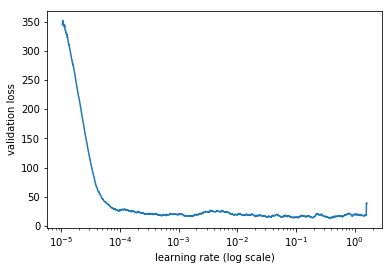

In [89]:
m.sched.plot()

In [90]:
lr=5e-4; wd=1e-7

In [91]:
%time m.fit(lr, 2, wd, cycle_len=1, cycle_mult=2, metrics=[rmse])

epoch      trn_loss   val_loss   rmse                          
    0      15.227886  15.488525  3.771931  
    1      12.535917  15.55474   3.755456                      
    2      13.935416  14.529819  3.625766                      

CPU times: user 26.1 s, sys: 801 ms, total: 26.9 s
Wall time: 25.2 s


[array([14.52982]), 3.625765886647851]

In [136]:
# m.predict(is_test=True)

In [92]:
l = m.predict(is_test=True)

In [93]:
l.shape

(123623, 1)

In [94]:
df.shape, df_t.shape

((201917, 113), (123623, 113))

In [95]:
df_test.shape

(123623, 135)

In [142]:
torch.__version__

'0.3.1.post2'

In [39]:
# cds = ColumnarDataset.from_data_frame(df_t,cat_flds=cat_flds)
# dl = DataLoader(cds)
# predictions = m.predict_dl(dl)

RuntimeError: cuda runtime error (59) : device-side assert triggered at /opt/conda/conda-bld/pytorch_1518244421288/work/torch/lib/THC/THCGeneral.c:844

In [38]:
# m.predict_array(df_t[cat_flds].values, df_t[cont_flds].values)

NotImplementedError: object

In [96]:
# l = m.predict(is_test=True)

In [97]:
%time m.fit(lr, 2, wd, cycle_len=2, cycle_mult=2, metrics=[rmse])

epoch      trn_loss   val_loss   rmse                          
    0      13.294061  14.742921  3.654648  
    1      13.896752  14.331877  3.594383                      
    2      11.770199  15.011213  3.677315                      
    3      17.282892  14.602047  3.665574                      
    4      14.269538  14.164847  3.57803                       
    5      11.953786  14.124732  3.566191                      

CPU times: user 54.1 s, sys: 1.62 s, total: 55.8 s
Wall time: 52.5 s


[array([14.12473]), 3.5661906499500207]

In [98]:
from sklearn.model_selection import StratifiedKFold

In [99]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4590)
oof = np.zeros(len(df_raw))
predictions = np.zeros(len(df_test))

In [102]:
outliers = df_raw['outliers']

In [101]:
target = df_raw['target']

In [103]:
val_idx[:5]

[189917, 189918, 189919, 189920, 189921]

1. Get the val_idx
2. Get the model data set 
`ColumnarModelData.from_data_frame(PATH, val_idx, df, y, cat_flds=cat_flds, bs=64)`
3. Get the learner from model `md.get_learner(`
4. Fit the model `m.fit`

In [109]:
l = m.predict(is_test=True).reshape(1, -1)[0]

In [110]:
l.shape

(123623,)

In [111]:
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df, outliers.values)):
    print("fold {}".format(fold_))
    md = ColumnarModelData.from_data_frame(PATH, val_idx, df, target.astype(np.float32), 
                                           cat_flds=cat_flds, bs=128, test_df=df_t)
    m = md.get_learner(emb_szs, len(df.columns)-len(cat_flds),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
    m.fit(lr, 2, wd, cycle_len=2, cycle_mult=1, metrics=[rmse])
    oof[val_idx] = m.predict().reshape(1, -1)[0]
    predictions += m.predict(is_test=True).reshape(1, -1)[0] / folds.n_splits

rmse(oof, target)

fold 0


epoch      trn_loss   val_loss   rmse                          
    0      13.252438  14.272474  3.691864  
    1      13.7039    13.951992  3.646141                      
    2      13.002302  13.77174   3.624562                      
    3      12.838314  13.655751  3.607016                      

fold 1


epoch      trn_loss   val_loss   rmse                          
    0      14.071089  14.71018   3.753652  
    1      13.673916  13.851845  3.63836                       
    2      14.276303  13.883272  3.646653                      
    3      11.945822  13.58156   3.599526                      

fold 2


epoch      trn_loss   val_loss   rmse                          
    0      13.237116  14.003774  3.633716  
    1      13.646907  13.654926  3.591715                      
    2      14.129115  13.696076  3.595298                      
    3      13.826535  13.522576  3.574844                      

fold 3


epoch      trn_loss   val_loss   rmse                          
    0      14.58264   14.360641  3.688091  
    1      13.27546   13.862714  3.627557                      
    2      12.960227  13.753141  3.609715                      
    3      12.819354  13.662845  3.598971                      

fold 4


epoch      trn_loss   val_loss   rmse                          
    0      14.371841  14.305679  3.678577  
    1      13.163964  13.824649  3.619093                      
    2      13.281218  13.670398  3.595098                      
    3      13.150278  13.593109  3.587094                      



1.9204810121779068

In [112]:
1.9204810121779068**2

3.6882473181358773

In [115]:
predictions.shape, oof.shape, target.shape

((123623,), (201917,), (201917,))

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>